# Correlation

## Dependency

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

**Pearson correlation coefficient** is a single number that shows the linear relationship between two variables. A corresponding **p-value** must be computed to interpret its statistical significance. Pearson correlation can over- or under-represent relationships if the data contains the nonlinearities or outliers. Pearson is appropriate for **normally distributed data** without outliers.

Correlation is the scaled covariance. Covariance is a single number that measures the linear relationship between two variables.

$c$ is covariance. $n$ is the number of data.

$$
c = \frac{1}{n - 1} \sum_{i = 1}^{n} (x_i - \bar{x}) (y_i - \bar{y})
$$

It's doing element-wise multiplication and sum, like a **dot product**.

$r$ is correlation coefficient

$$
r = \frac{\sum_{i = 1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i = 1}^{n} (x_i - \bar{x})^2 \sum_{i = 1}^{n} (y_i - \bar{y})^2}}
$$

p-value

$$
t_{n - 2} = \frac{r \sqrt{n - 2}}{1 - r^2}
$$

- When we have a larger sample size, numerator gets bigger, t-value gets larger, and we get a small p-value
- When we have $r$ closer to 1 or -1, denominator gets smaller, t-value gets larger, and we get a small p-value.




In [1]:
# 138. Code: correlation coefficient

## Simulated data with specified correlation

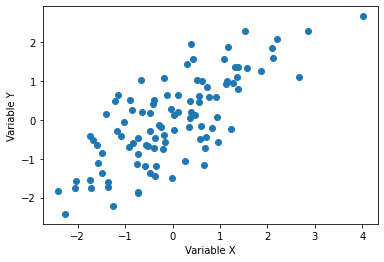

Desired r: 0.7, empirical r: 0.749


In [12]:
n = 100
r = 0.7

x = np.random.randn(n)
y = np.random.randn(n)

y = x * r + y * np.sqrt(1 - r**2)

plt.scatter(x, y)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.show()

empirical_r = np.corrcoef(x, y)

print(f'Desired r: {r}, empirical r: {empirical_r[0, 1]:.3f}')

## Partial correlation

We wanna know the correlation between 2 variables when partialling out the effect of another variable.

Partial correlation between $x$ and $y$ when accounting for the shared variable $z$ is,

$$
\rho_{xy|z} = \frac{r_{xy} - r_{xz} r_{yz}}{\sqrt{1 - r_{xz}^2} \sqrt{1 - r_{yz}^2}}
$$

The numerator is the thing we are interested in minus the thing we are not interested in. 

When there is no correlation between $x$ and $z$, and between $y$ and $z$, $r_{xz} = 0$ and $r_{yz} = 0$, numerator multiplication term will be 0, and denominator will be 1, so $\rho_{xy|z} = r_{xy}$.

In [1]:
# 145. Code: partial correlation

## Spearman (rank) correlation

1. Transform **both** variables to **rank**, e.g. $[12345, -50, 1, 0] \rightarrow [4, 1, 3, 2]$
2. Compute Pearson correlation coefficient on ranks.
3. P-value is the same as for regular Pearson coefficient.

It's a major **non-parametric** correlation method as an alternative to Pearson correlation.